In [1]:
import sys
sys.path.append("../MILESTONE1")

from file import preprocessing, df_suffle

Image mode (Channel Code) RGB
Image_size(Pixels) (2480, 3508)
DPI (301.0, 301.0)


In [2]:
X=[]
y=[]

for idx,row in df_suffle.iterrows():
    img=preprocessing(row['Image'])
    X.append(img)
    y.append(row['Brand'])

In [3]:
import numpy as np
import cv2
X=np.array(X)
y=np.array(y)

In [4]:
def noise_extract(img):
    img = img.squeeze()
    img_uint8 = (img * 255).astype(np.uint8)

    
    smooth = cv2.GaussianBlur(img_uint8, (5,5), 0)

    noise = img_uint8.astype(np.float32) - smooth.astype(np.float32)
    return noise


In [6]:
!pip install --force-reinstall matplotlib opencv-python scikit-image


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e2/e2/fd0bbadf837f81edb0d208ba8f8cb552874c3b16e27cb91a31977d90875d/matplotlib-3.10.8-cp310-cp310-win_amd64.whl.metadata
  Using cached matplotlib-3.10.8-cp310-cp310-win_amd64.whl.metadata (52 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fa/80/eb88edc2e2b11cd2dd2e56f1c80b5784d11d6e6b7f04a1145df64df40065/opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/5f/ee/c53a009e3997dda9d285402f19226fbd17b5b3cb215da391c4ed084a1424/scikit_image-0.25.2-cp310-cp310-win_amd64.whl.metadata
  Using cached scikit_image-0.25.2-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/54/ec/516

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda3\\envs\\testrav\\Lib\\site-packages\\~~l\\_avif.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
import matplotlib.pyplot as plt

def v_noise(img, title="Noise Map"):
    noise = noise_extract(img)

    plt.figure(figsize=(3,3))
    plt.imshow(noise, cmap='gray')
    plt.title(title)
    plt.show()


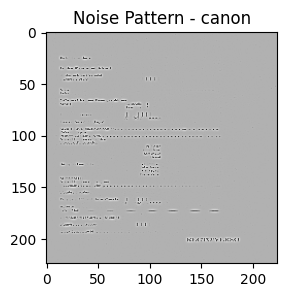

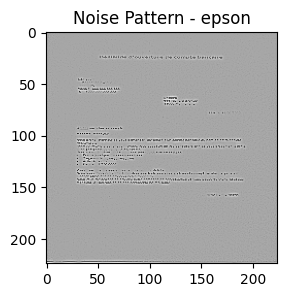

In [6]:
v_noise(X[10], title=f"Noise Pattern - {y[10]}")
v_noise(X[30], title=f"Noise Pattern - {y[30]}")

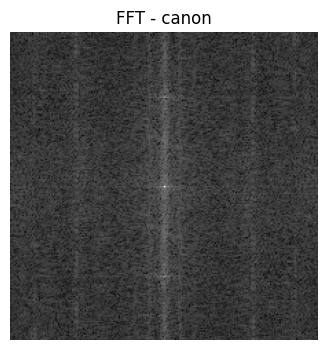

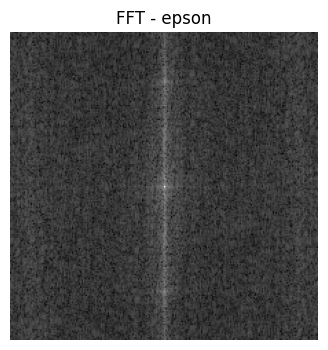

In [7]:
def fft_extract(img):
    img = img.squeeze()

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = np.log(np.abs(fshift) + 1)

    return magnitude

def fft_v(img, title="FFT Spectrum"):
    fft_mag = fft_extract(img)

    plt.figure(figsize=(4,4))
    plt.imshow(fft_mag, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    
fft_v(X[10], f"FFT - {y[10]}")
fft_v(X[30], f"FFT - {y[30]}")

In [21]:
!pip install scikit-image

  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/5f/ee/c53a009e3997dda9d285402f19226fbd17b5b3cb215da391c4ed084a1424/scikit_image-0.25.2-cp310-cp310-win_amd64.whl.metadata
  Using cached scikit_image-0.25.2-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Obtaining dependency information for scipy>=1.11.4 from https://files.pythonhosted.org/packages/d1/84/55bc4881973d3f79b479a5a2e2df61c8c9a04fcb986a213ac9c02cfb659b/scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for networkx>=3.0 from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for imageio!=2.35.0,>=2.33 from https://files.pythonhosted.org/packages/fb/fe/301e0936b79bcab4cacc7548bf2853fc28d

In [8]:
from skimage.feature import local_binary_pattern

def lbp(img, p=8, r=1):
    img = img.squeeze()
    img_uint8 = (img * 255).astype(np.uint8)

    lbp = local_binary_pattern(img_uint8, p, r, method='uniform')

    hist, _ = np.histogram(
        lbp.ravel(),
        bins=np.arange(0, p + 3),
        range=(0, p + 2)
    )

    hist = hist.astype("float")
    hist = hist/(hist.sum() + 1e-6)

    return hist

In [9]:
lbp_features = [] 
labels = [] 
for i in range(len(X)): 
    lbp_feat = lbp(X[i]) 
    lbp_features.append(lbp_feat) 
    labels.append(y[i]) 
    
lbp_features = np.array(lbp_features) 
labels = np.array(labels)

In [10]:
lbp_features

array([[0.01281489, 0.07571349, 0.00209263, ..., 0.13534359, 0.19754464,
        0.32172752],
       [0.13520408, 0.11513473, 0.04356665, ..., 0.10979353, 0.15937899,
        0.25396604],
       [0.09137835, 0.13825335, 0.02604831, ..., 0.11025191, 0.15700733,
        0.29366629],
       ...,
       [0.03228635, 0.10305724, 0.00733418, ..., 0.12996253, 0.17430644,
        0.31756218],
       [0.00556043, 0.04261001, 0.00087691, ..., 0.152842  , 0.23495297,
        0.25958626],
       [0.02048788, 0.07340163, 0.00745376, ..., 0.13847258, 0.21404656,
        0.25717474]])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test=train_test_split(
    lbp_features,
    labels,
    test_size=0.20,
    random_state=42,
    stratify=labels
)

In [20]:
svm=SVC(kernel='rbf',C=10,gamma='scale')
svm.fit(X_train,y_train)

y_pred=svm.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

0.91
              precision    recall  f1-score   support

       canon       0.84      0.95      0.89        40
       epson       0.94      0.82      0.88        40
          hp       1.00      1.00      1.00        20

    accuracy                           0.91       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.91      0.91      0.91       100



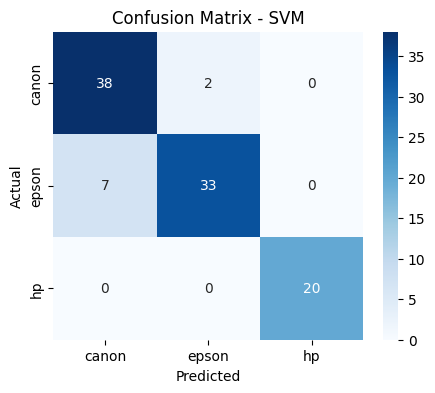

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


In [25]:
cv_scores = cross_val_score(svm, lbp_features,labels, cv=5)
print("Cross_Val_score",cv_scores)

Cross_Val_score [0.9  0.93 0.93 0.9  0.92]


In [27]:
image_path=df_suffle['Image'].iloc[1]
true_label=df_suffle['Brand'].iloc[1]

In [28]:
img=preprocessing(image_path)
imag_label=lbp(img)
imag_label=imag_label.reshape(1,-1)

predict_label=svm.predict(imag_label)[0]
print("Prediction Label",predict_label)
print("true_label",true_label)

Prediction Label hp
true_label hp
